# Imports

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [56]:
LABELED_PATH = "data/results/labels.parquet"
PREDICTED_XGB_PATH = "data/results/xgb_predictions.parquet"
PREDICTED_RF_PATH = "data/results/rf_predictions.parquet"
PREDICTED_RIDGE_PATH = "data/results/ridge_test_predictions.parquet"
PREDICTED_VOTING_PATH = "data/results/voting_predictions.parquet"
TEST_START_DATE = '2023-04-01'
TEST_START_DATE_BASE_LINE = '2023-03-25'
HIGH_DEMAND_NUMS = 30
MID_DEMAND_NUMS = 100
SAVE_PLOT_PATH = 'data/pngs/'
warnings.filterwarnings('ignore')

In [57]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_rf':None,
            'model_xgboost':None,
            'model_ridge':None,
            'model_voting':None
        }
    },
    
    
}

In [58]:
predictions_dict = {
    'baseline_last_day':None,
    'baseline_last_week':None,
    'model_rf':None,
    'model_xgboost':None,
    'model_ridge':None,
    'model_voting':None
}

In [59]:
sorted_locations_dict={
    'baseline_last_week':None,
    'model_rf':None,
    'model_xgboost':None,
    'model_ridge':None,
    'model_voting':None
}

In [60]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_rf':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_ridge':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_voting':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [61]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(31440, 3)


Location       Date  Demand
0         1 2023-01-01    40.0
1         1 2023-01-02    31.0
2         1 2023-01-03    27.0
3         1 2023-01-04     7.0
4         1 2023-01-05    15.0

In [62]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(7860, 3)


Location       Date  Demand
0         1 2023-04-01    13.0
1         1 2023-04-02    17.0
2         1 2023-04-03     9.0
3         1 2023-04-04    12.0
4         1 2023-04-05    18.0

In [63]:
test_df

Location       Date  Demand
0            1 2023-04-01    13.0
1            1 2023-04-02    17.0
2            1 2023-04-03     9.0
3            1 2023-04-04    12.0
4            1 2023-04-05    18.0
...        ...        ...     ...
7855       265 2023-04-26    78.0
7856       265 2023-04-27    44.0
7857       265 2023-04-28    55.0
7858       265 2023-04-29    45.0
7859       265 2023-04-30    69.0

[7860 rows x 3 columns]

## Load Predicted Data

In [64]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         16.602369
1         1 2023-04-02         15.138164
2         1 2023-04-03         11.663722
3         1 2023-04-04          9.706129
4         1 2023-04-05         11.803359

In [65]:
predictions_dict['model_ridge'] = pd.read_parquet(PREDICTED_RIDGE_PATH)
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         18.718806
1         1 2023-04-02         20.378561
2         1 2023-04-03         10.842180
3         1 2023-04-04         10.880406
4         1 2023-04-05         10.410875

In [66]:
predictions_dict['model_rf'] = pd.read_parquet(PREDICTED_RF_PATH)
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         16.733646
1         1 2023-04-02         17.222722
2         1 2023-04-03         11.105846
3         1 2023-04-04         10.116908
4         1 2023-04-05         10.442570

In [67]:
predictions_dict['model_voting'] = pd.read_parquet(PREDICTED_VOTING_PATH)
print(predictions_dict['model_voting'].shape)
predictions_dict['model_voting'].head()

(7860, 3)


Location       Date  Predicted_demand
0         1 2023-04-01         16.804526
1         1 2023-04-02         16.093030
2         1 2023-04-03         11.461668
3         1 2023-04-04          9.850146
4         1 2023-04-05         11.153611

In [68]:
pd.concat(
    [predictions_dict['model_voting']['Predicted_demand'], 
    predictions_dict['model_rf']['Predicted_demand'],
    predictions_dict['model_ridge']['Predicted_demand'],
    predictions_dict['model_xgboost']['Predicted_demand']], axis = 1
    )

Predicted_demand  Predicted_demand  Predicted_demand  Predicted_demand
0            16.804526         16.733646         18.718806         16.602369
1            16.093030         17.222722         20.378561         15.138164
2            11.461668         11.105846         10.842180         11.663722
3             9.850146         10.116908         10.880406          9.706129
4            11.153611         10.442570         10.410875         11.803359
...                ...               ...               ...               ...
7855         53.268192         53.817921         51.272973         53.496414
7856         71.485252         72.398047         75.500920         70.344864
7857         56.412839         57.314843         52.137401         56.253719
7858         63.804919         64.687889         62.571383         64.704857
7859         68.126066         70.009604         75.453725         65.144569

[7860 rows x 4 columns]

### BaseLine Models

In [69]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [70]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE_BASE_LINE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
baseline_test_df.head()

(9694, 3)


Location       Date  Demand
0         1 2023-03-25    15.0
1         1 2023-03-26    14.0
2         1 2023-03-27     3.0
3         1 2023-03-28    14.0
4         1 2023-03-29     7.0

In [71]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7860, 3)


Location       Date  Predicted_demand
7          1 2023-04-01              15.0
8          1 2023-04-02              14.0
9          1 2023-04-03               3.0
10         1 2023-04-04              14.0
11         1 2023-04-05               7.0

### Join Predictions and Actual

In [72]:
def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.merge(predicted_df, how='left', on=['Location', 'Date'])
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df

In [73]:
predictions_dict['baseline_last_week'] = join_actual_predict(test_df,predictions_dict['baseline_last_week'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0              15.0            5
1         1 2023-04-02    17.0              14.0            6
2         1 2023-04-03     9.0               3.0            0
3         1 2023-04-04    12.0              14.0            1
4         1 2023-04-05    18.0               7.0            2

In [74]:
predictions_dict['model_ridge'] = join_actual_predict(test_df,predictions_dict['model_ridge'])
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         18.718806            5
1         1 2023-04-02    17.0         20.378561            6
2         1 2023-04-03     9.0         10.842180            0
3         1 2023-04-04    12.0         10.880406            1
4         1 2023-04-05    18.0         10.410875            2

In [75]:
predictions_dict['model_xgboost'] = join_actual_predict(test_df,predictions_dict['model_xgboost'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         16.602369            5
1         1 2023-04-02    17.0         15.138164            6
2         1 2023-04-03     9.0         11.663722            0
3         1 2023-04-04    12.0          9.706129            1
4         1 2023-04-05    18.0         11.803359            2

In [76]:
predictions_dict['model_rf'] = join_actual_predict(test_df,predictions_dict['model_rf'])
print(predictions_dict['model_rf'].shape)
predictions_dict['model_rf'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         16.733646            5
1         1 2023-04-02    17.0         17.222722            6
2         1 2023-04-03     9.0         11.105846            0
3         1 2023-04-04    12.0         10.116908            1
4         1 2023-04-05    18.0         10.442570            2

In [77]:
predictions_dict['model_voting'] = join_actual_predict(test_df,predictions_dict['model_voting'])
print(predictions_dict['model_voting'].shape)
predictions_dict['model_voting'].head()

(7860, 5)


Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         16.804526            5
1         1 2023-04-02    17.0         16.093030            6
2         1 2023-04-03     9.0         11.461668            0
3         1 2023-04-04    12.0          9.850146            1
4         1 2023-04-05    18.0         11.153611            2

### Sort Locations by Demand

In [78]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index

In [79]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost'].shape)
sorted_locations_dict['model_xgboost'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

In [80]:
predictions_dict['model_xgboost'].head()

Location       Date  Demand  Predicted_demand  day_of_week
0         1 2023-04-01    13.0         16.602369            5
1         1 2023-04-02    17.0         15.138164            6
2         1 2023-04-03     9.0         11.663722            0
3         1 2023-04-04    12.0          9.706129            1
4         1 2023-04-05    18.0         11.803359            2

In [81]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['baseline_last_week'].shape)
sorted_locations_dict['baseline_last_week'].head()

(262, 2)


Location       sum
0       132  173355.0
1       237  153779.0
2       161  149098.0
3       236  138316.0
4       142  113448.0

# Mean error Calculation

### Error Columns

In [82]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [83]:
calculate_error(predictions_dict)


In [84]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()


(7860, 8)


Location       Date  Demand  Predicted_demand  day_of_week  error  \
0         1 2023-04-01    13.0              15.0            5    2.0   
1         1 2023-04-02    17.0              14.0            6    3.0   
2         1 2023-04-03     9.0               3.0            0    6.0   
3         1 2023-04-04    12.0              14.0            1    2.0   
4         1 2023-04-05    18.0               7.0            2   11.0   

   squared_error  percentage_error  
0            4.0         15.384615  
1            9.0         17.647059  
2           36.0         66.666667  
3            4.0         16.666667  
4          121.0         61.111111

In [85]:
predictions_dict['baseline_last_week'].tail()

Location       Date  Demand  Predicted_demand  day_of_week  error  \
7855       265 2023-04-26    78.0              42.0            2   36.0   
7856       265 2023-04-27    44.0              63.0            3   19.0   
7857       265 2023-04-28    55.0              53.0            4    2.0   
7858       265 2023-04-29    45.0              46.0            5    1.0   
7859       265 2023-04-30    69.0              77.0            6    8.0   

      squared_error  percentage_error  
7855         1296.0         46.153846  
7856          361.0         43.181818  
7857            4.0          3.636364  
7858            1.0          2.222222  
7859           64.0         11.594203

In [86]:
print(predictions_dict['model_ridge'].shape)
predictions_dict['model_ridge'].head()

(7860, 8)


Location       Date  Demand  Predicted_demand  day_of_week     error  \
0         1 2023-04-01    13.0         18.718806            5  5.718806   
1         1 2023-04-02    17.0         20.378561            6  3.378561   
2         1 2023-04-03     9.0         10.842180            0  1.842180   
3         1 2023-04-04    12.0         10.880406            1  1.119594   
4         1 2023-04-05    18.0         10.410875            2  7.589125   

   squared_error  percentage_error  
0      32.704743         43.990816  
1      11.414673         19.873887  
2       3.393629         20.468671  
3       1.253490          9.329947  
4      57.594816         42.161805

### Aggregate Error Columns

In [87]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            high_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:HIGH_DEMAND_NUMS])]
            mid_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])]
            low_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])]
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error',]] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    high_demand_mean_df = high_demand_mean_df.reindex(sorted_index[:HIGH_DEMAND_NUMS])
                    mid_demand_mean_df = mid_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])
                    low_demand_mean_df = low_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])
                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                
    

In [88]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [89]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].tail()

(30, 5)


Date       mape    mae      mse  demand_mean
25 2023-04-26  22.756799  13.80   637.28       209.21
26 2023-04-27  29.327185  21.23  1941.67       222.06
27 2023-04-28  29.504681  20.45  1584.09       237.15
28 2023-04-29  52.847701  29.75  2799.11       234.43
29 2023-04-30  41.127649  20.72  1717.92       195.58

In [90]:
print(predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].tail()

(100, 5)


Location        mape       mae        mse  demand_mean
95       191   73.810719  2.645242  11.656954          7.1
96        62   55.253101  2.716376  10.508959          6.9
97       254   66.507669  2.635537  10.949270          6.8
98        56  100.000000  2.850845  11.767702          6.8
99        92   76.056531  2.958922  12.476377          6.7

In [91]:
print(predictions_mean_error_dict['model_ridge']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_ridge']['Location']['mid_demand_loc'].tail()

(100, 5)


Location        mape       mae        mse  demand_mean
95       191   72.860095  3.007848  14.448265          7.1
96        62   66.403567  3.241230  13.771225          6.9
97       254   68.435953  2.650741  11.191314          6.8
98        56  100.000000  3.272945  16.046771          6.8
99        92   81.027679  3.325460  17.142038          6.7

### Plot Mape for Models Predicted Demands

In [92]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


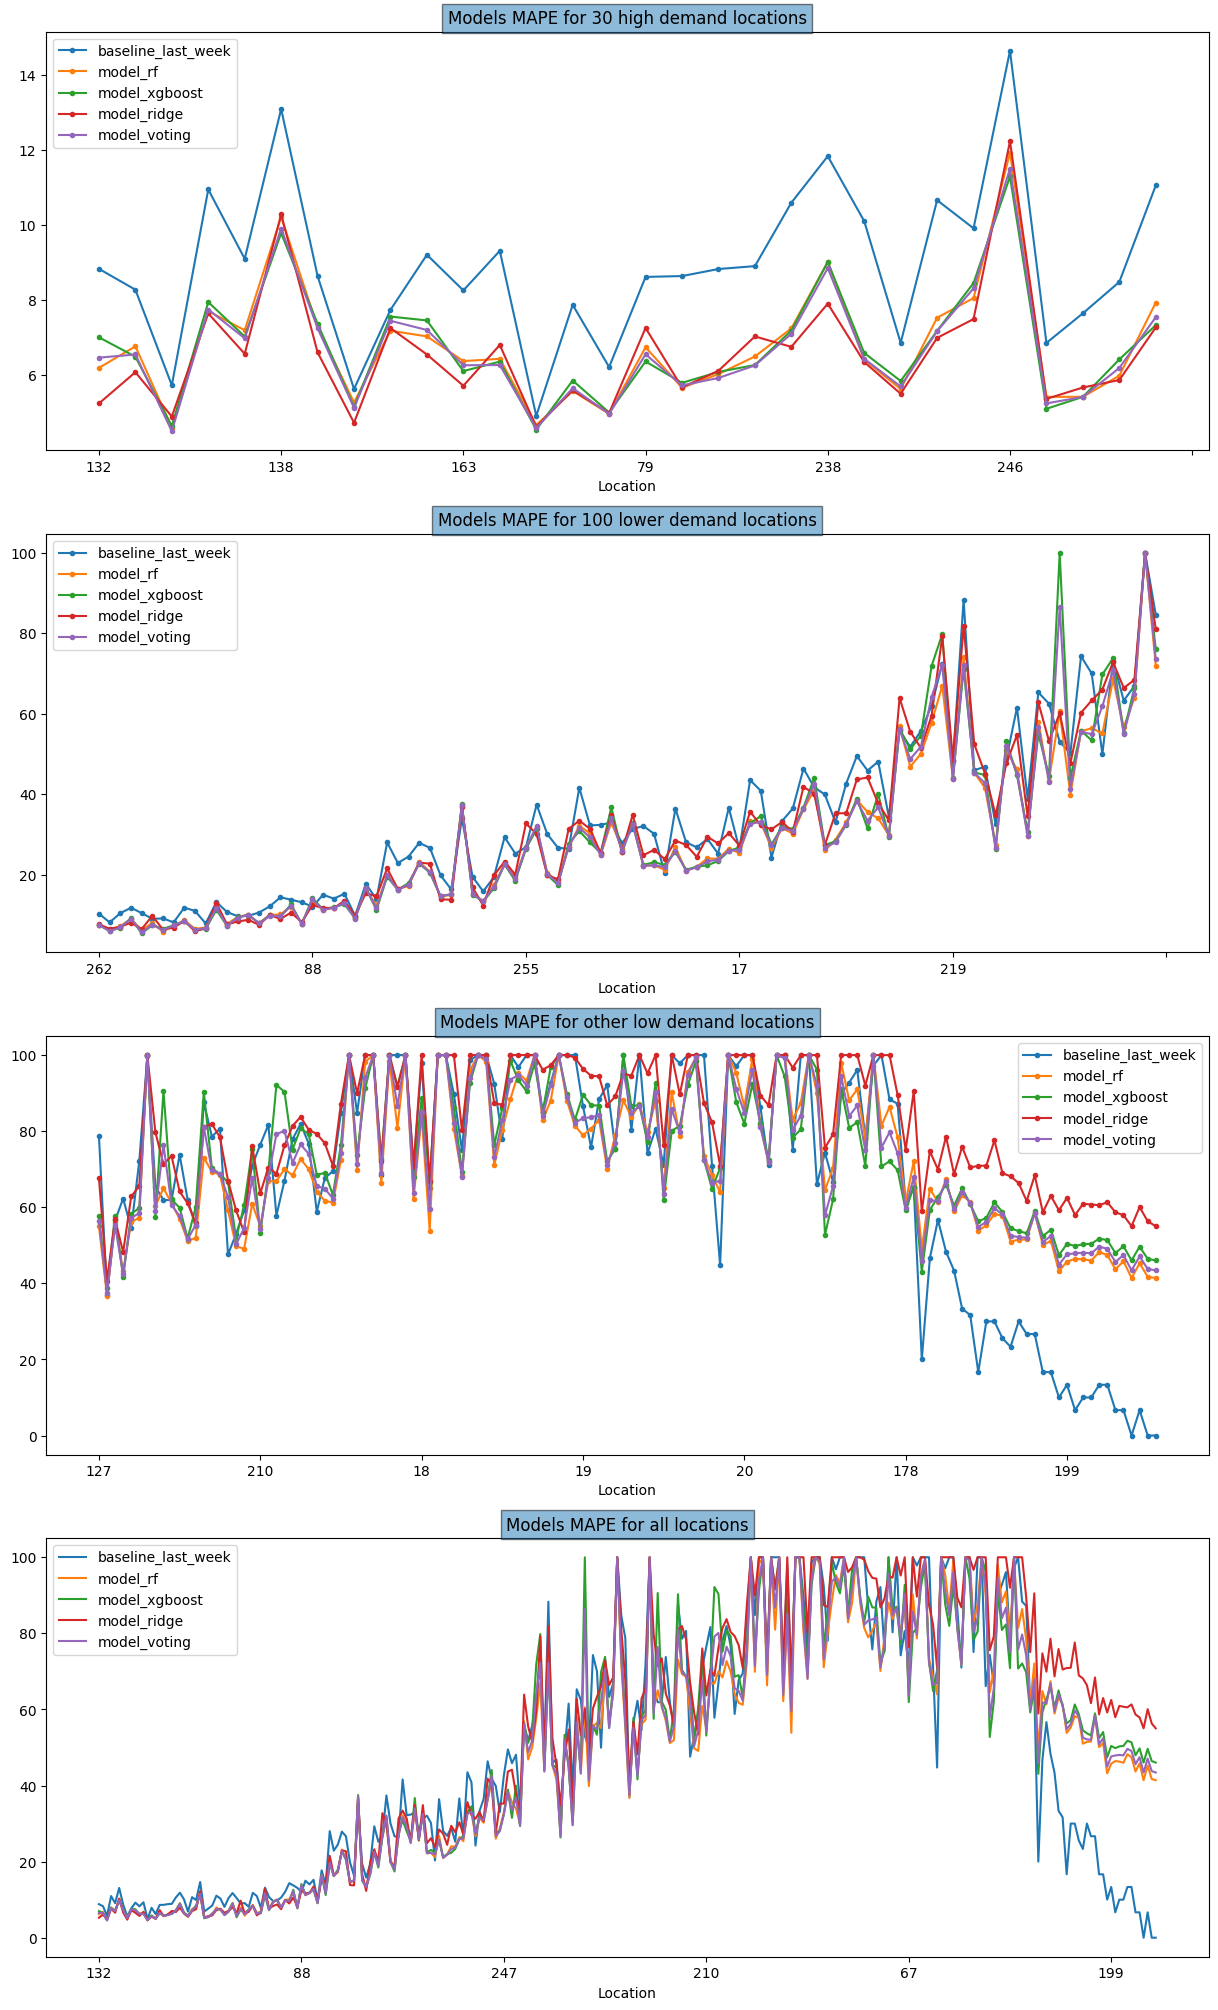

In [93]:
plot_mape(predictions_mean_error_dict, 'Location')

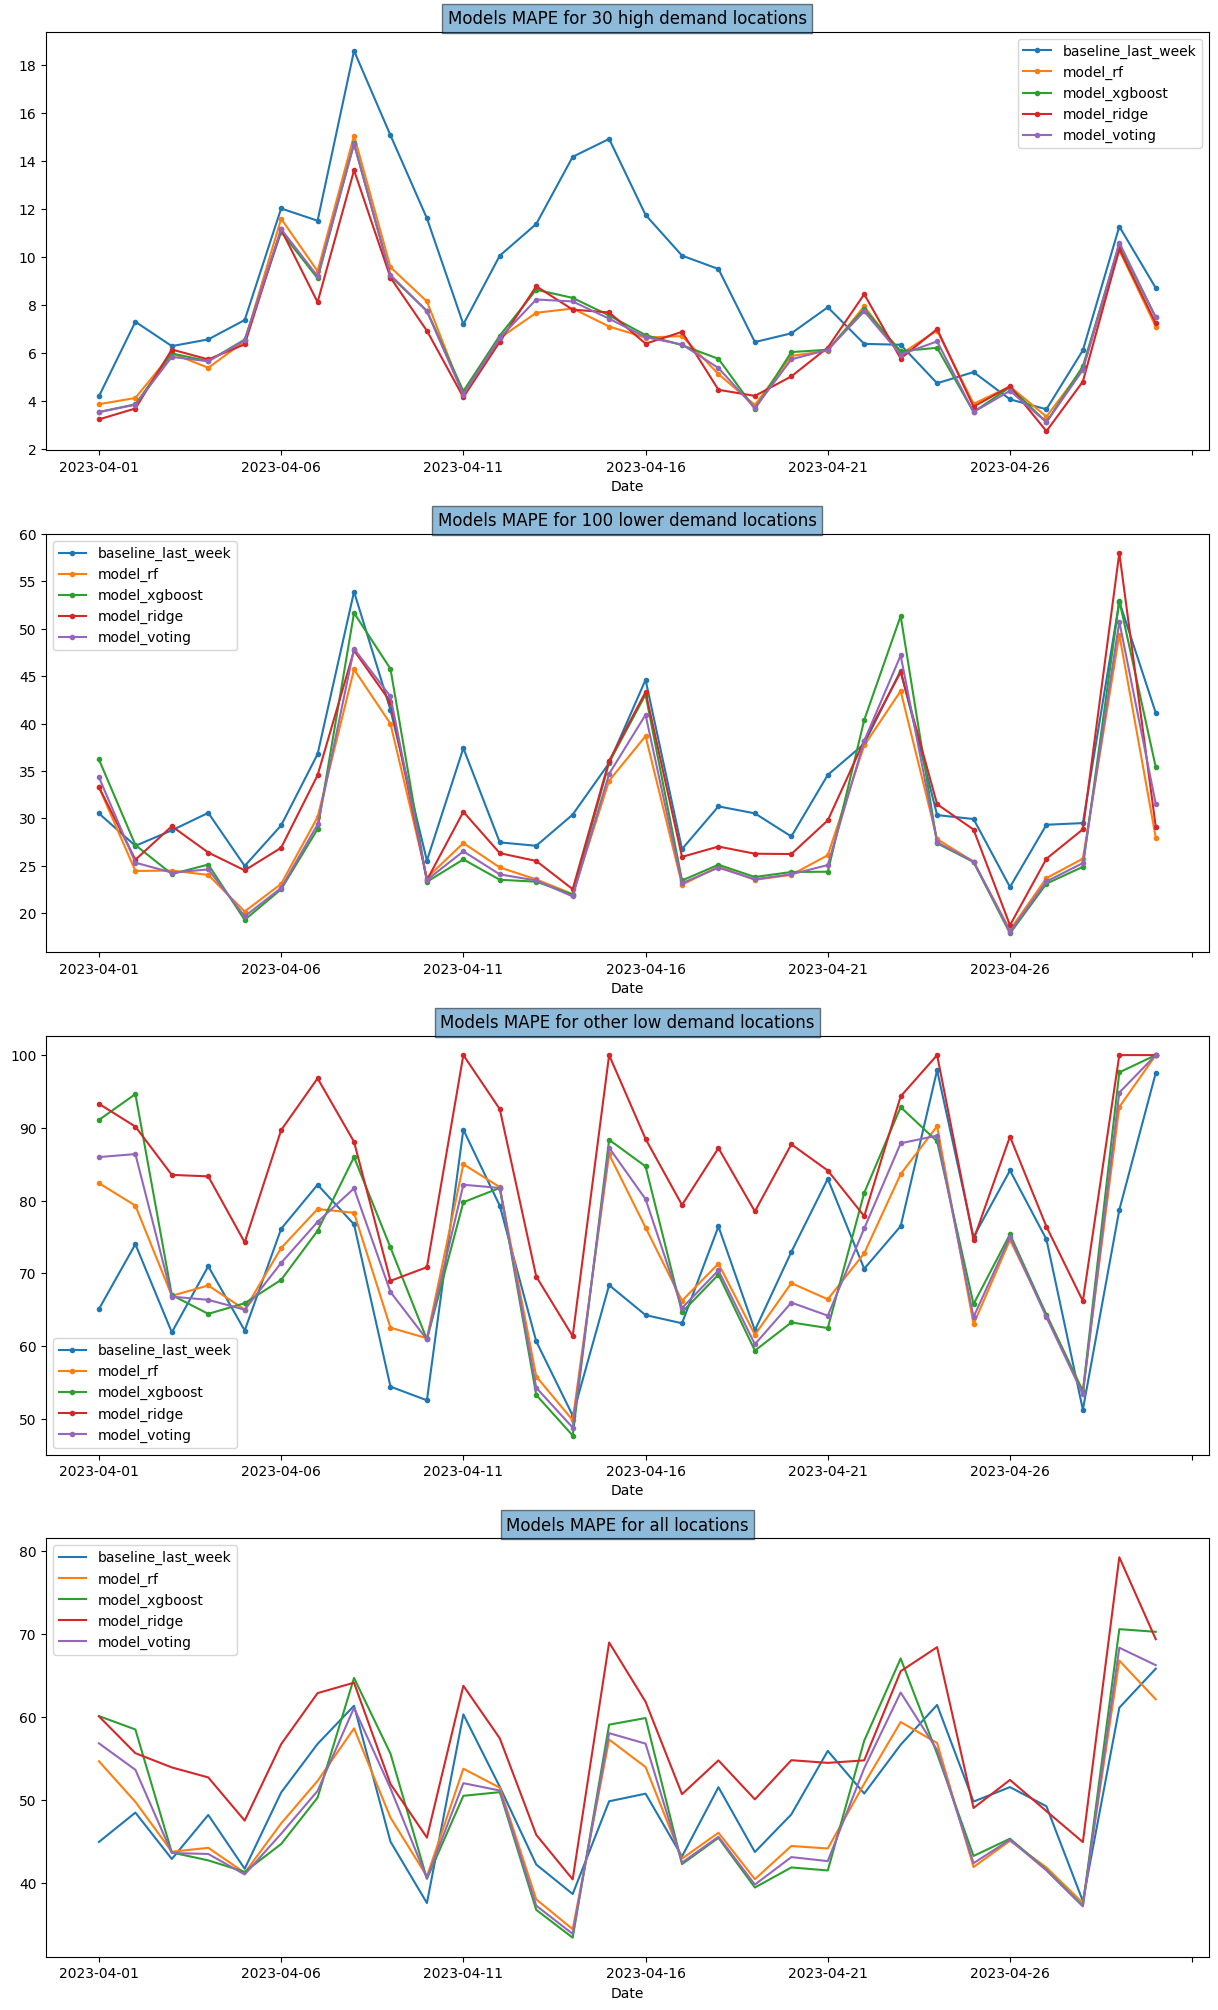

In [94]:
plot_mape(predictions_mean_error_dict, 'Date')

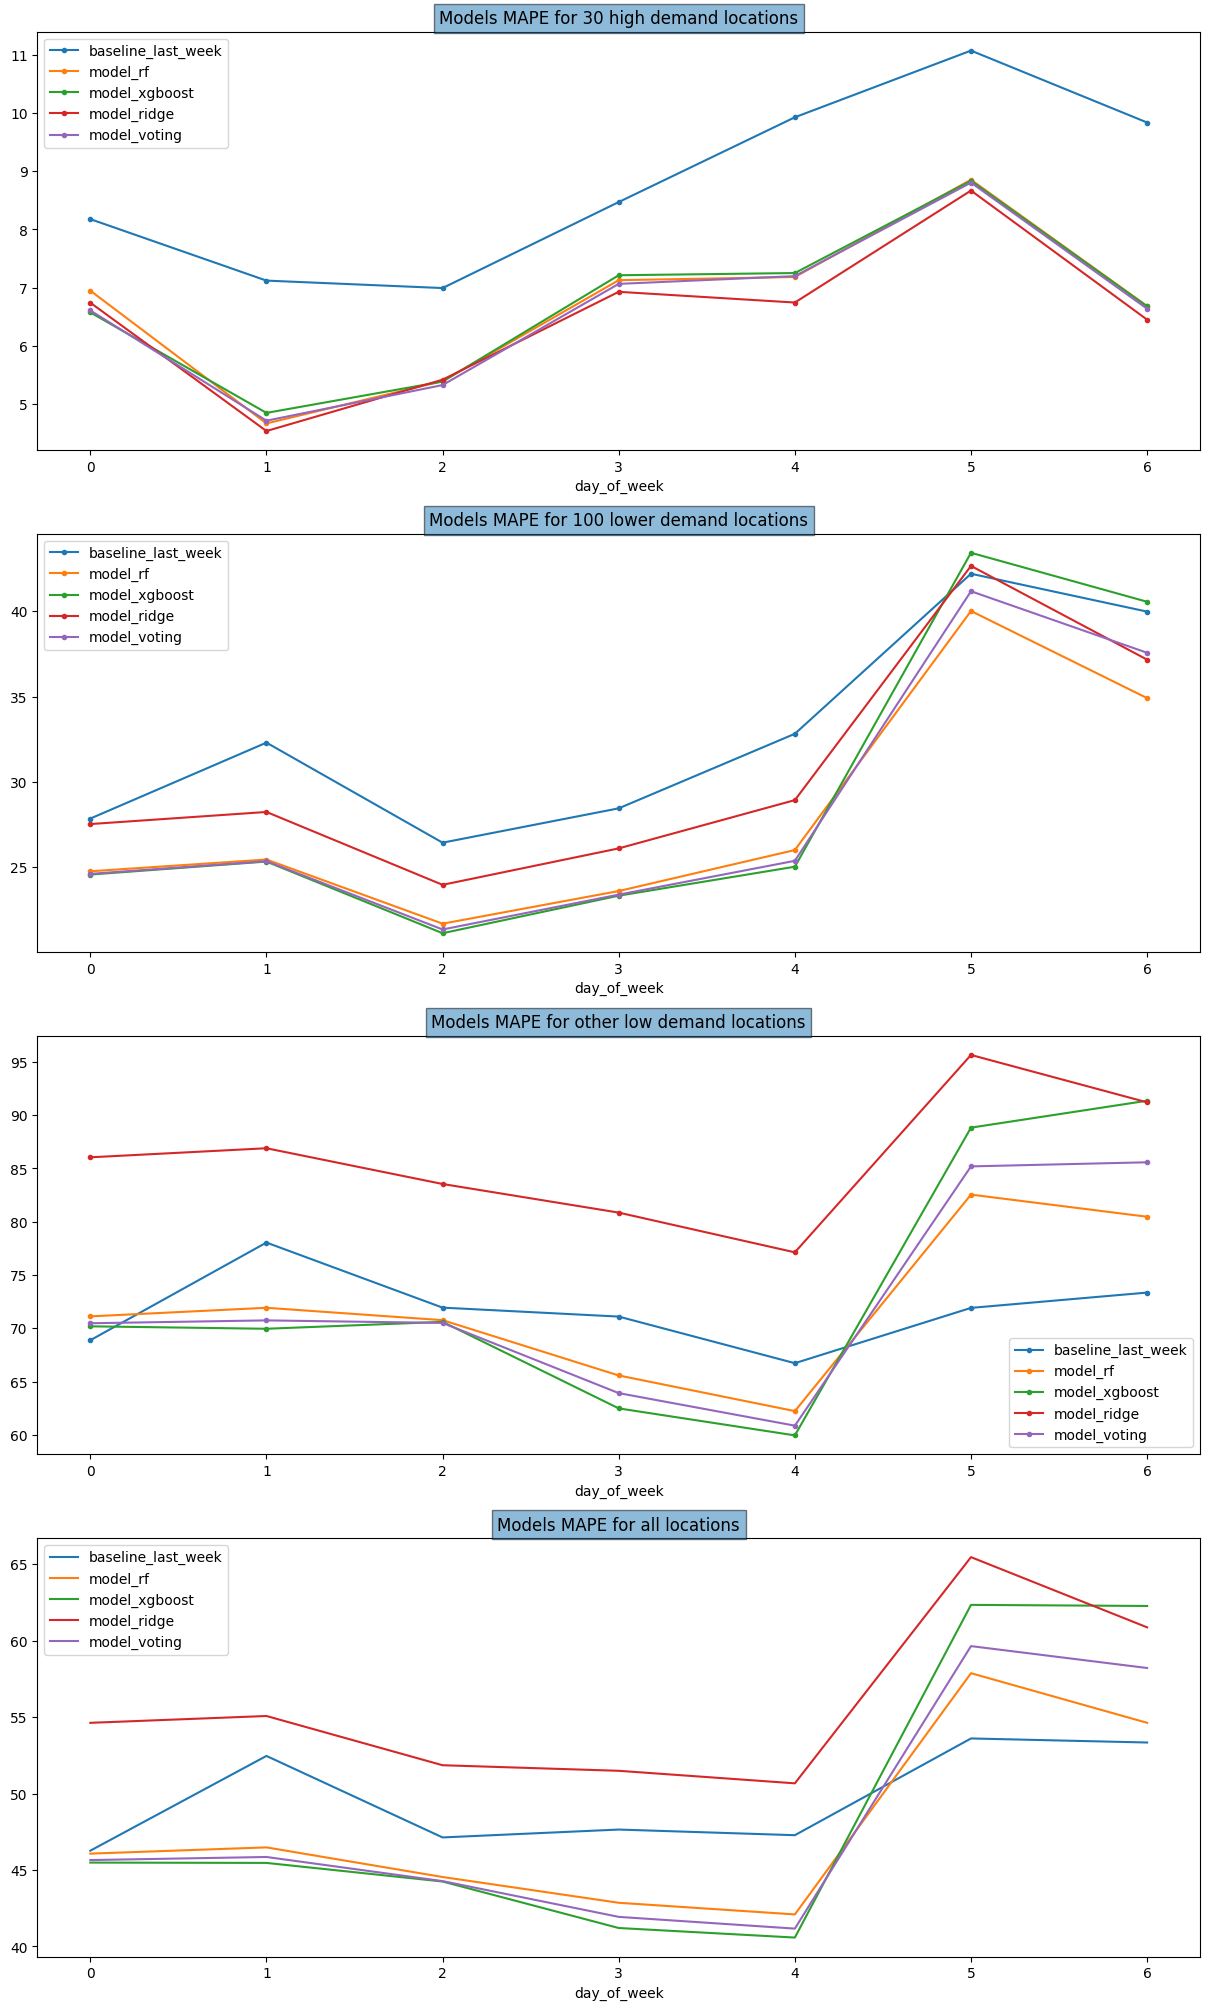

In [95]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [96]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


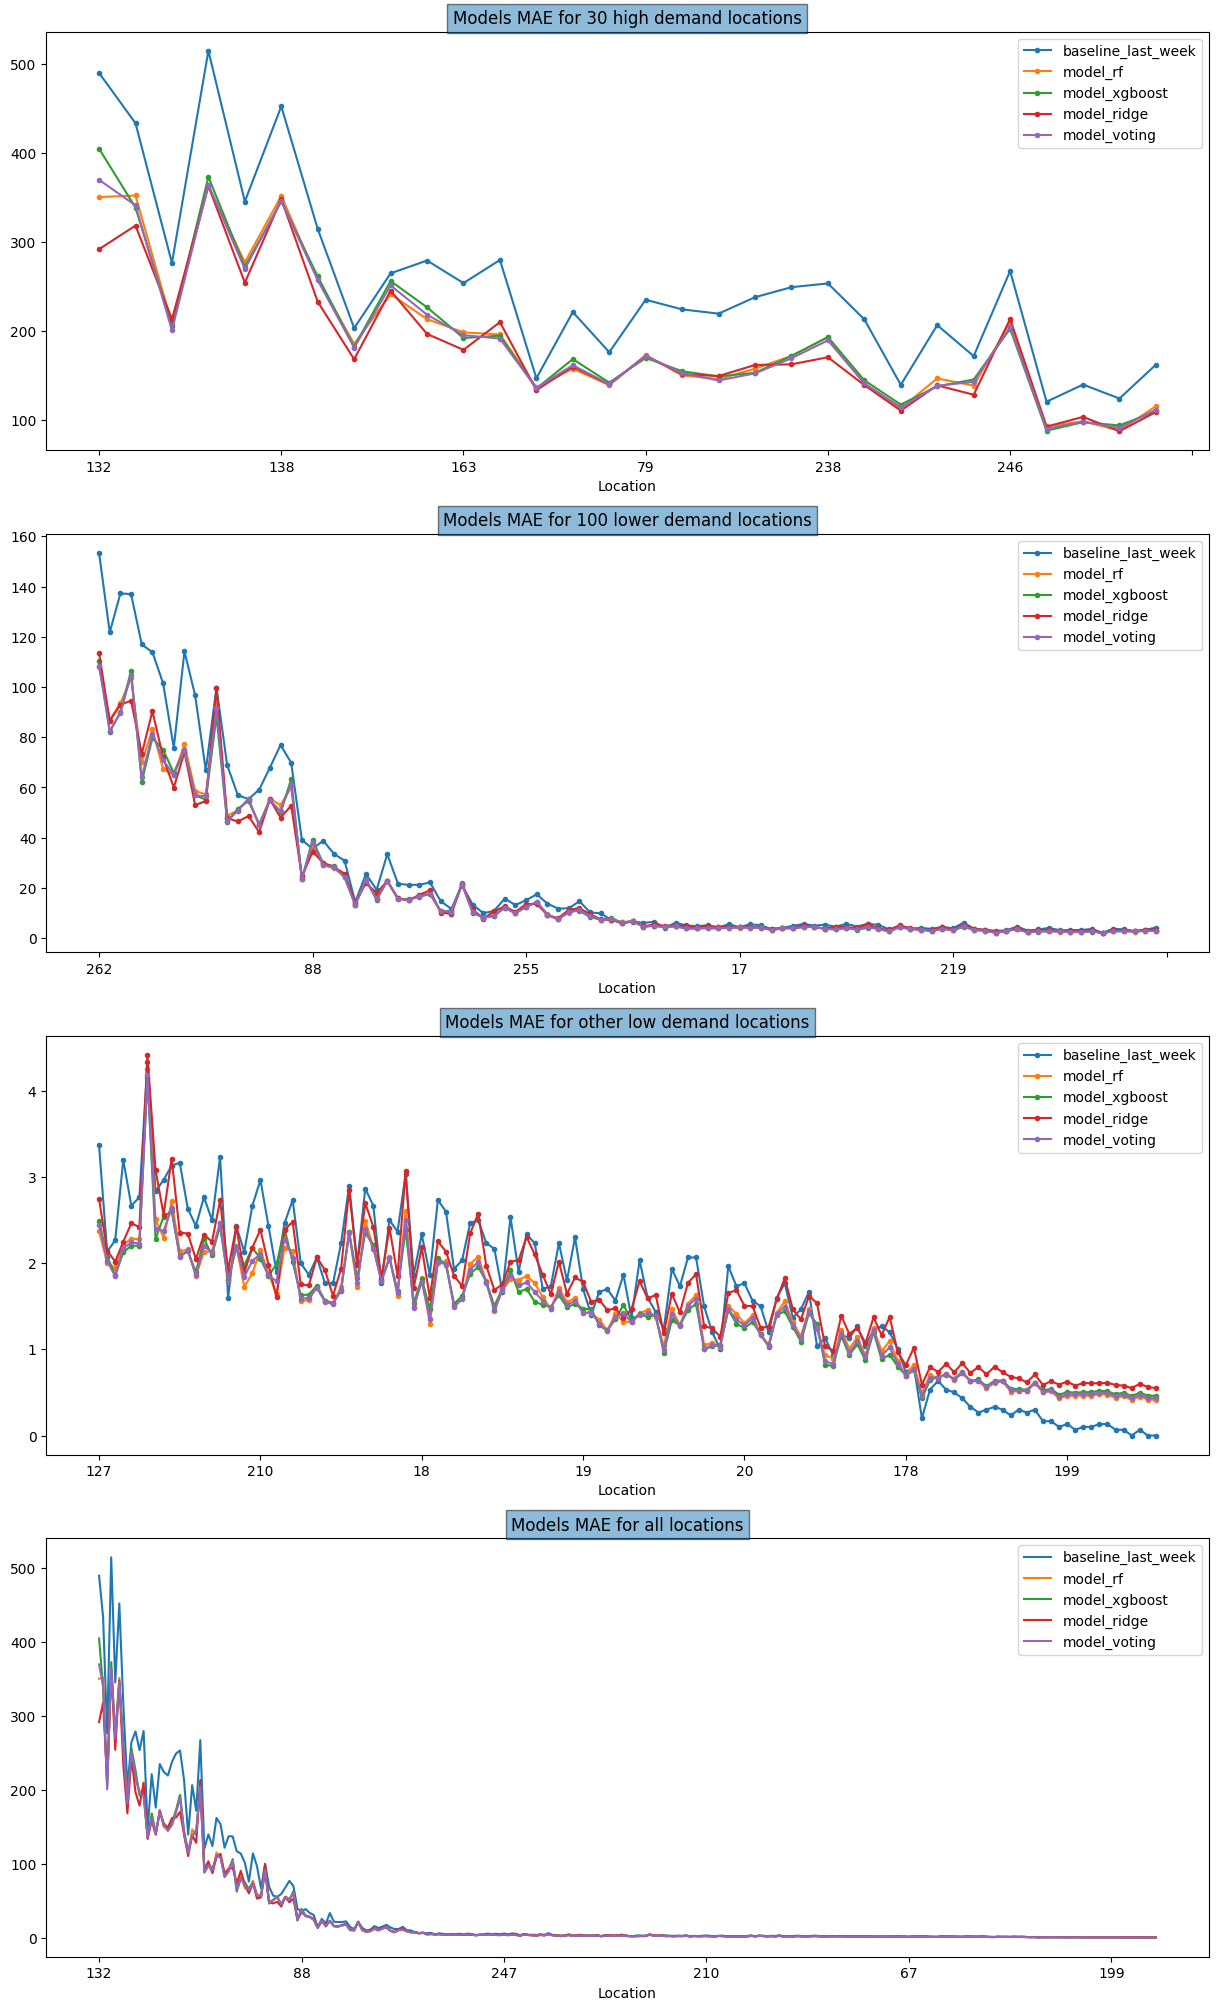

In [97]:
plot_mae(predictions_mean_error_dict, 'Location')

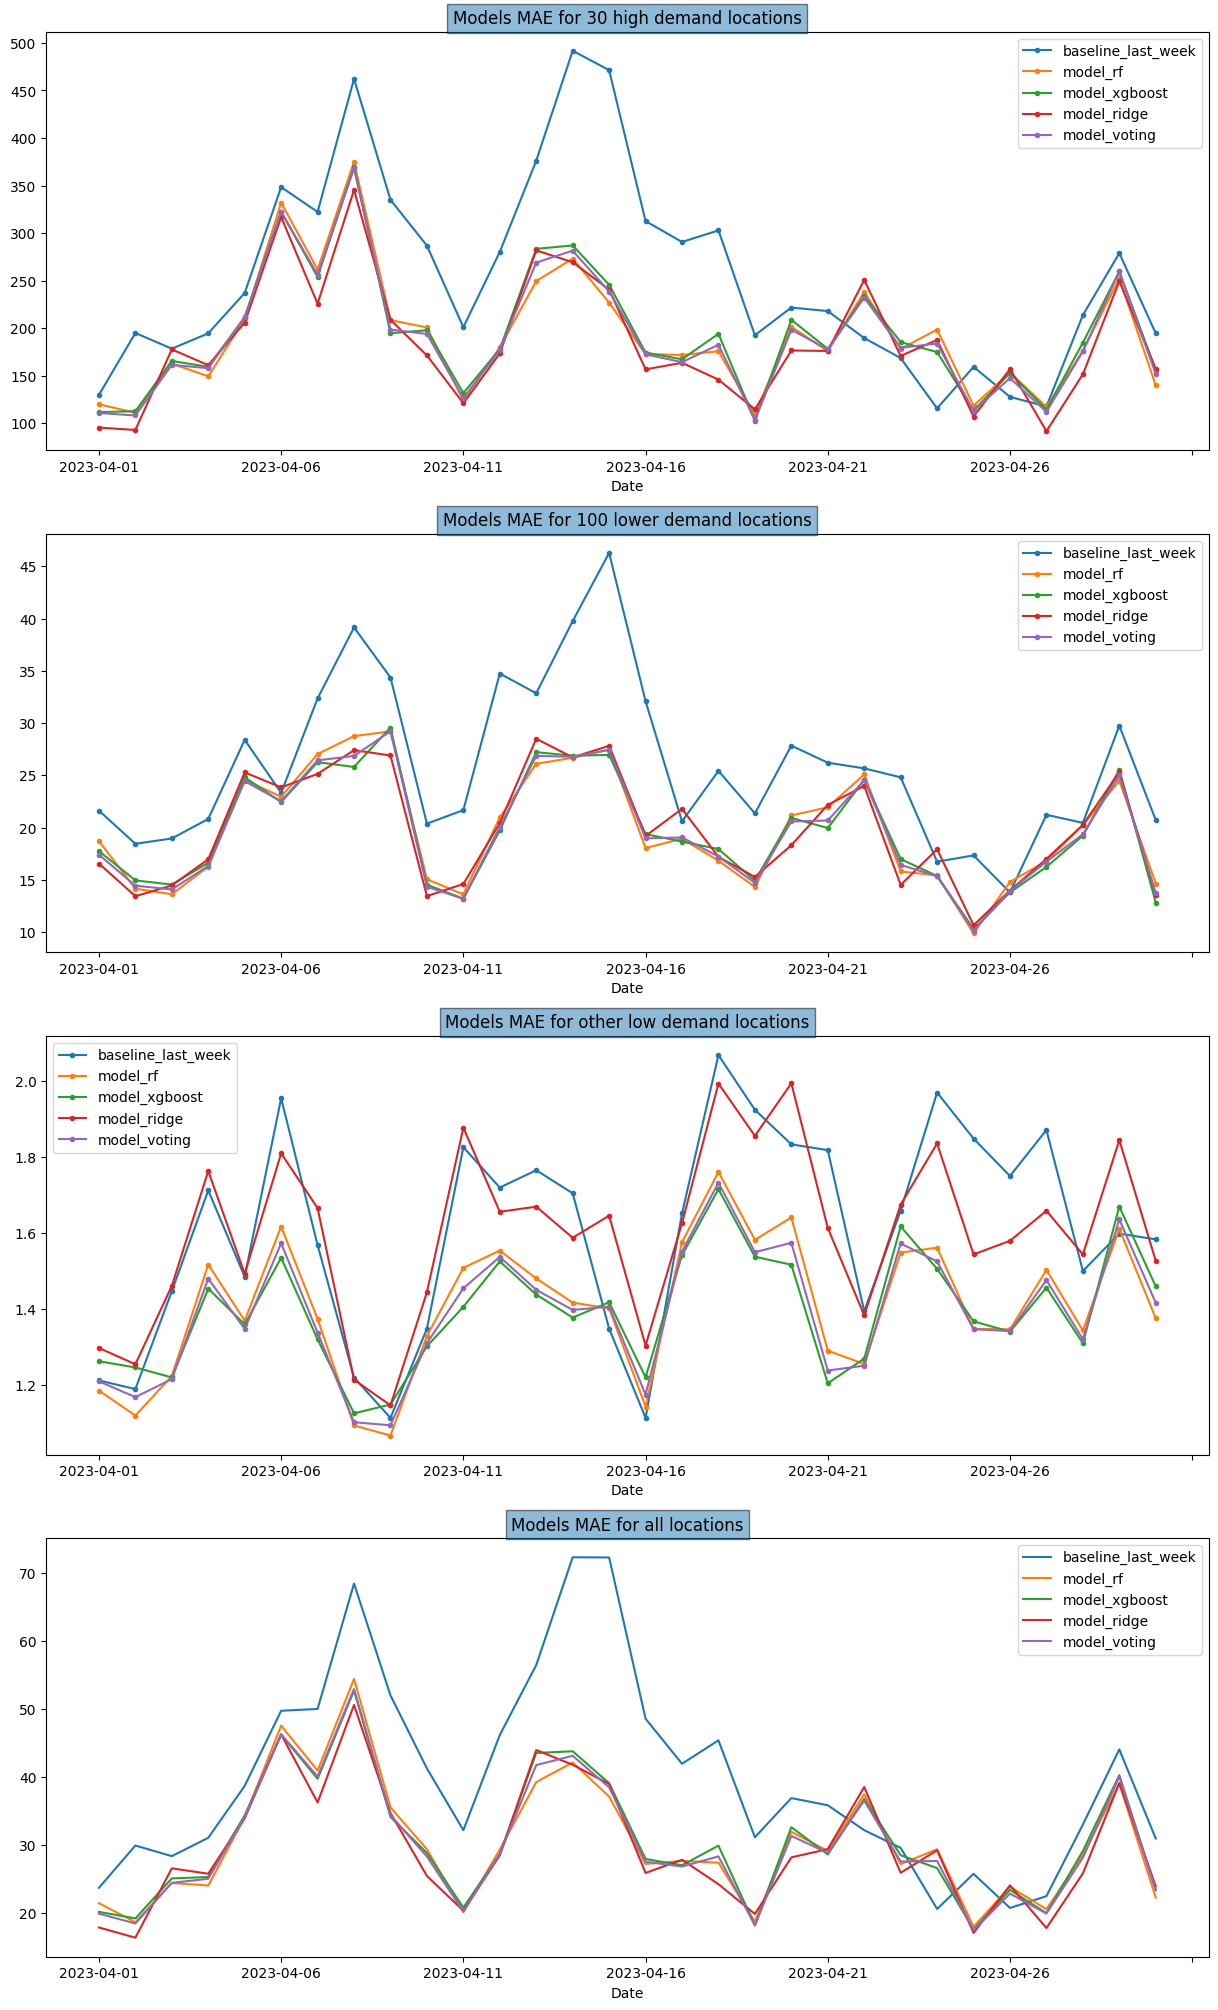

In [98]:
plot_mae(predictions_mean_error_dict, 'Date')

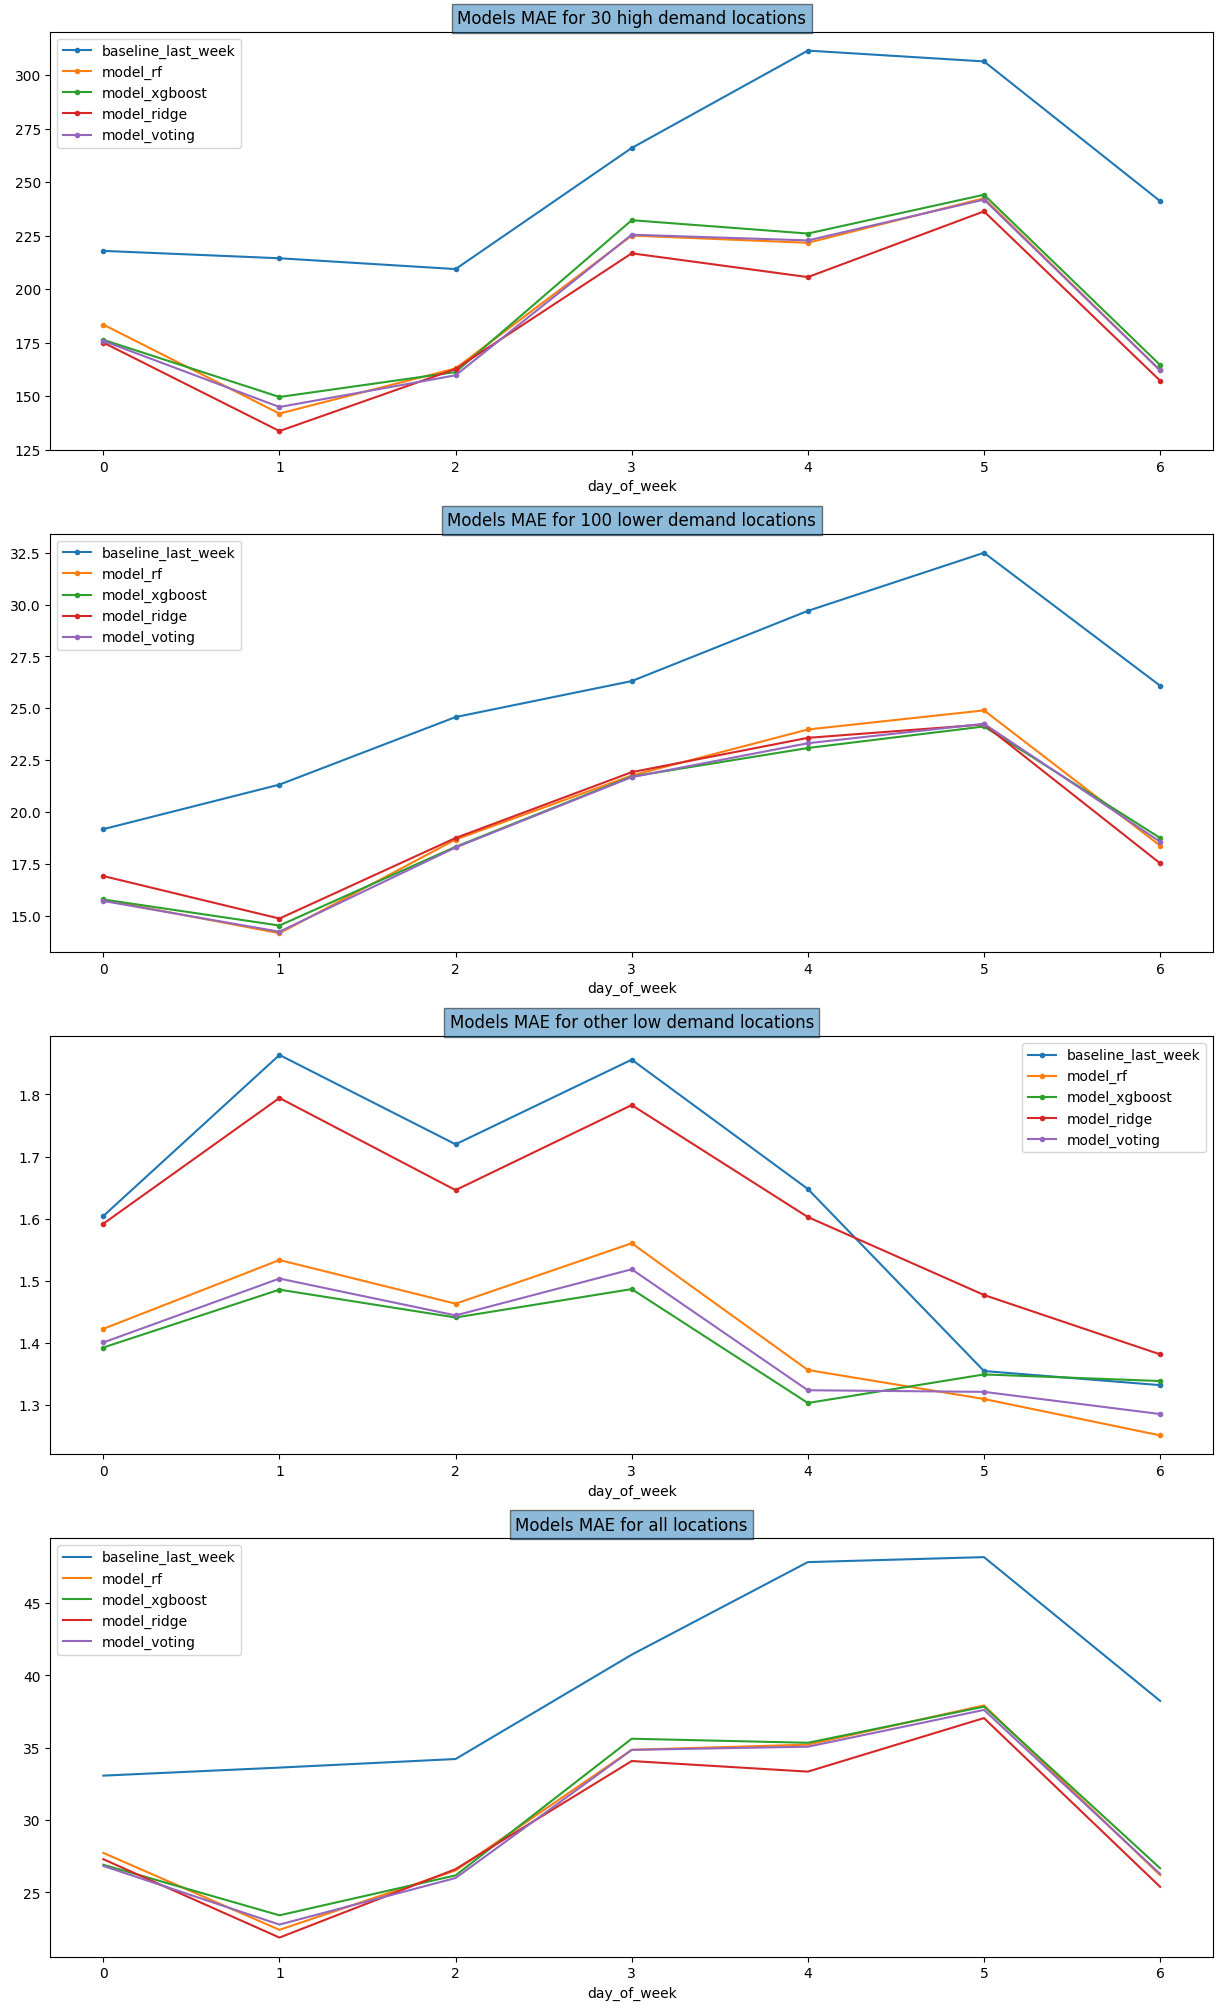

In [99]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [100]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


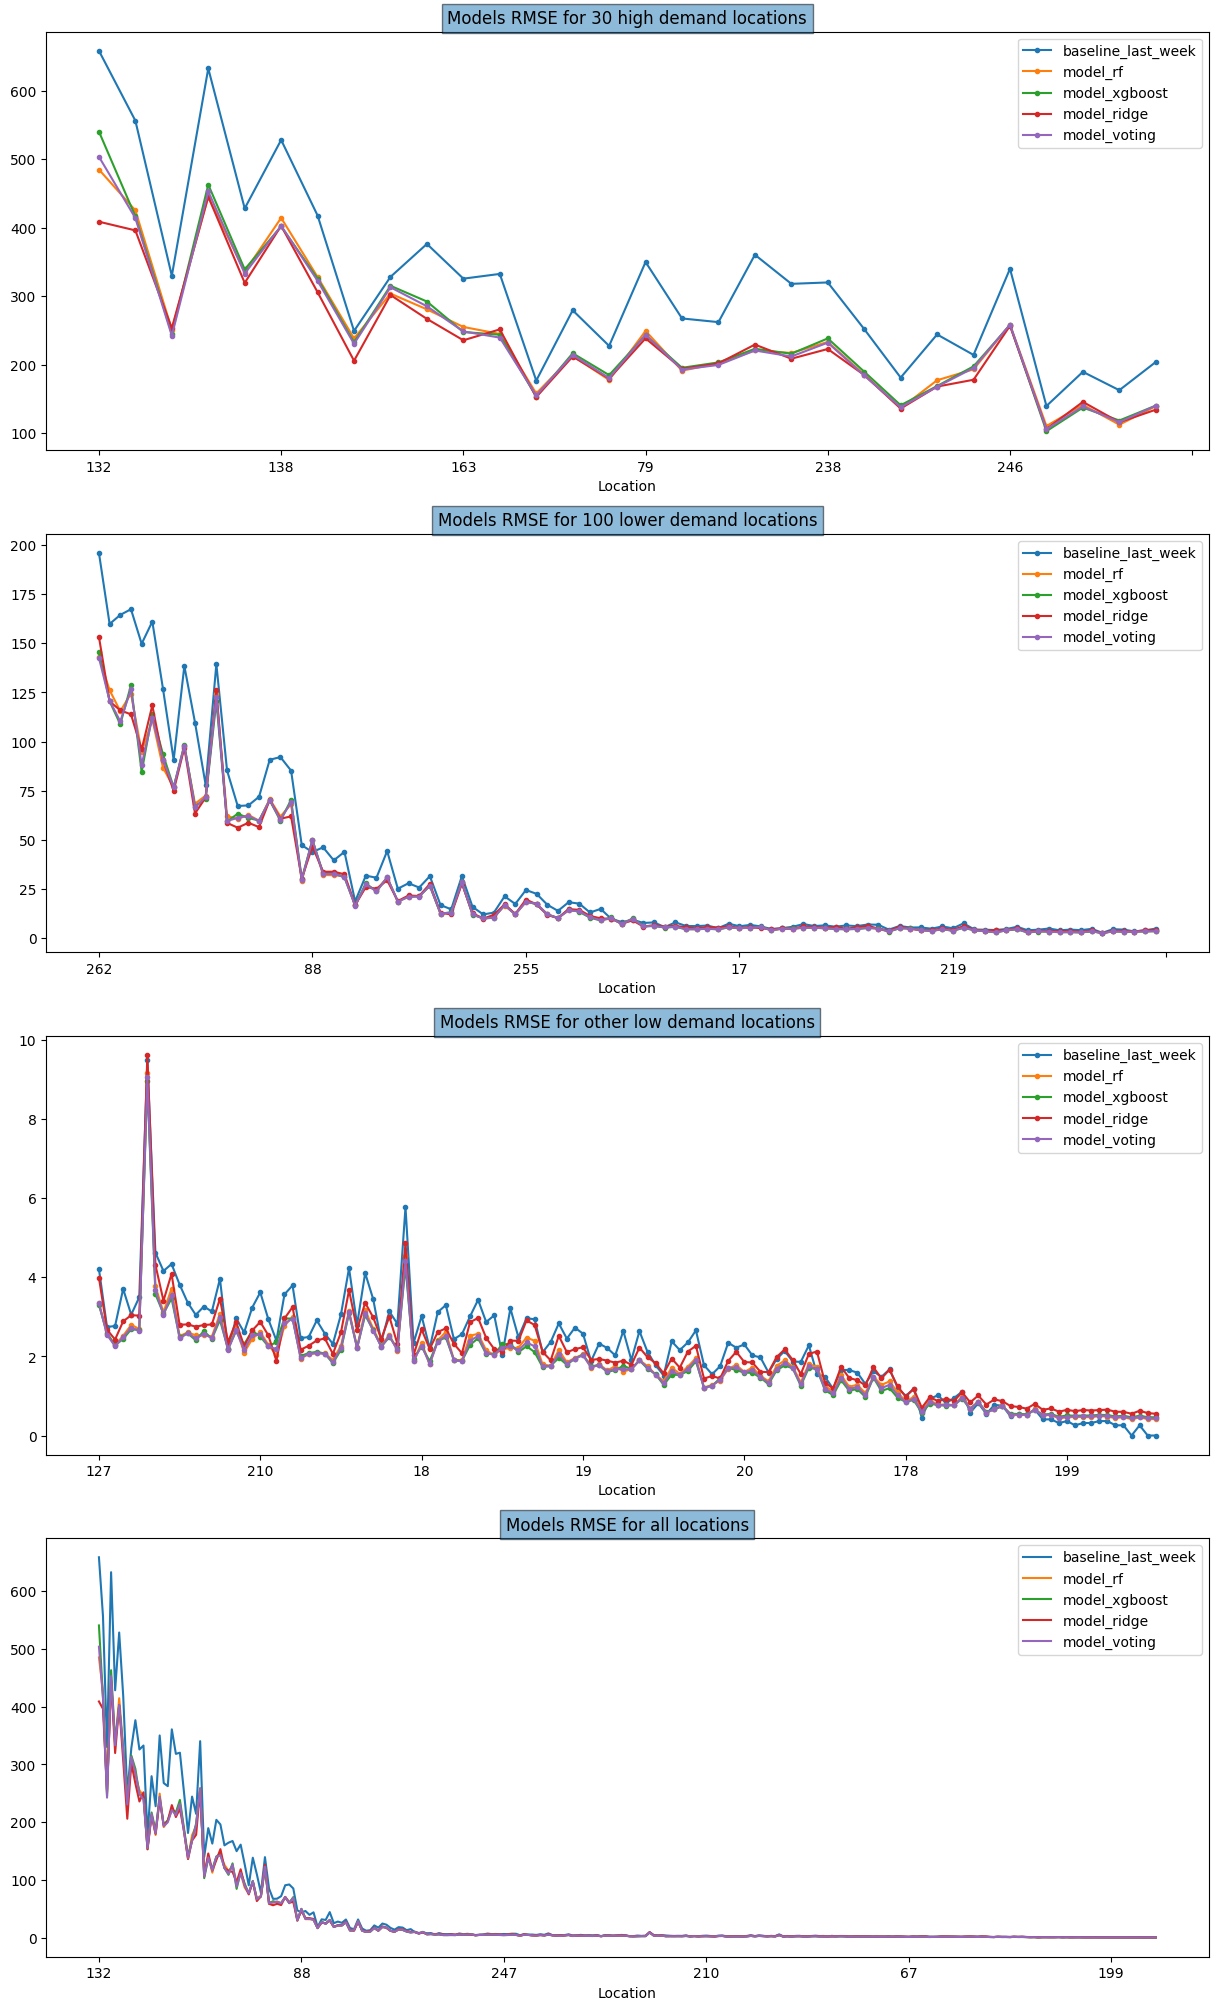

In [101]:
plot_rmse(predictions_mean_error_dict, 'Location')

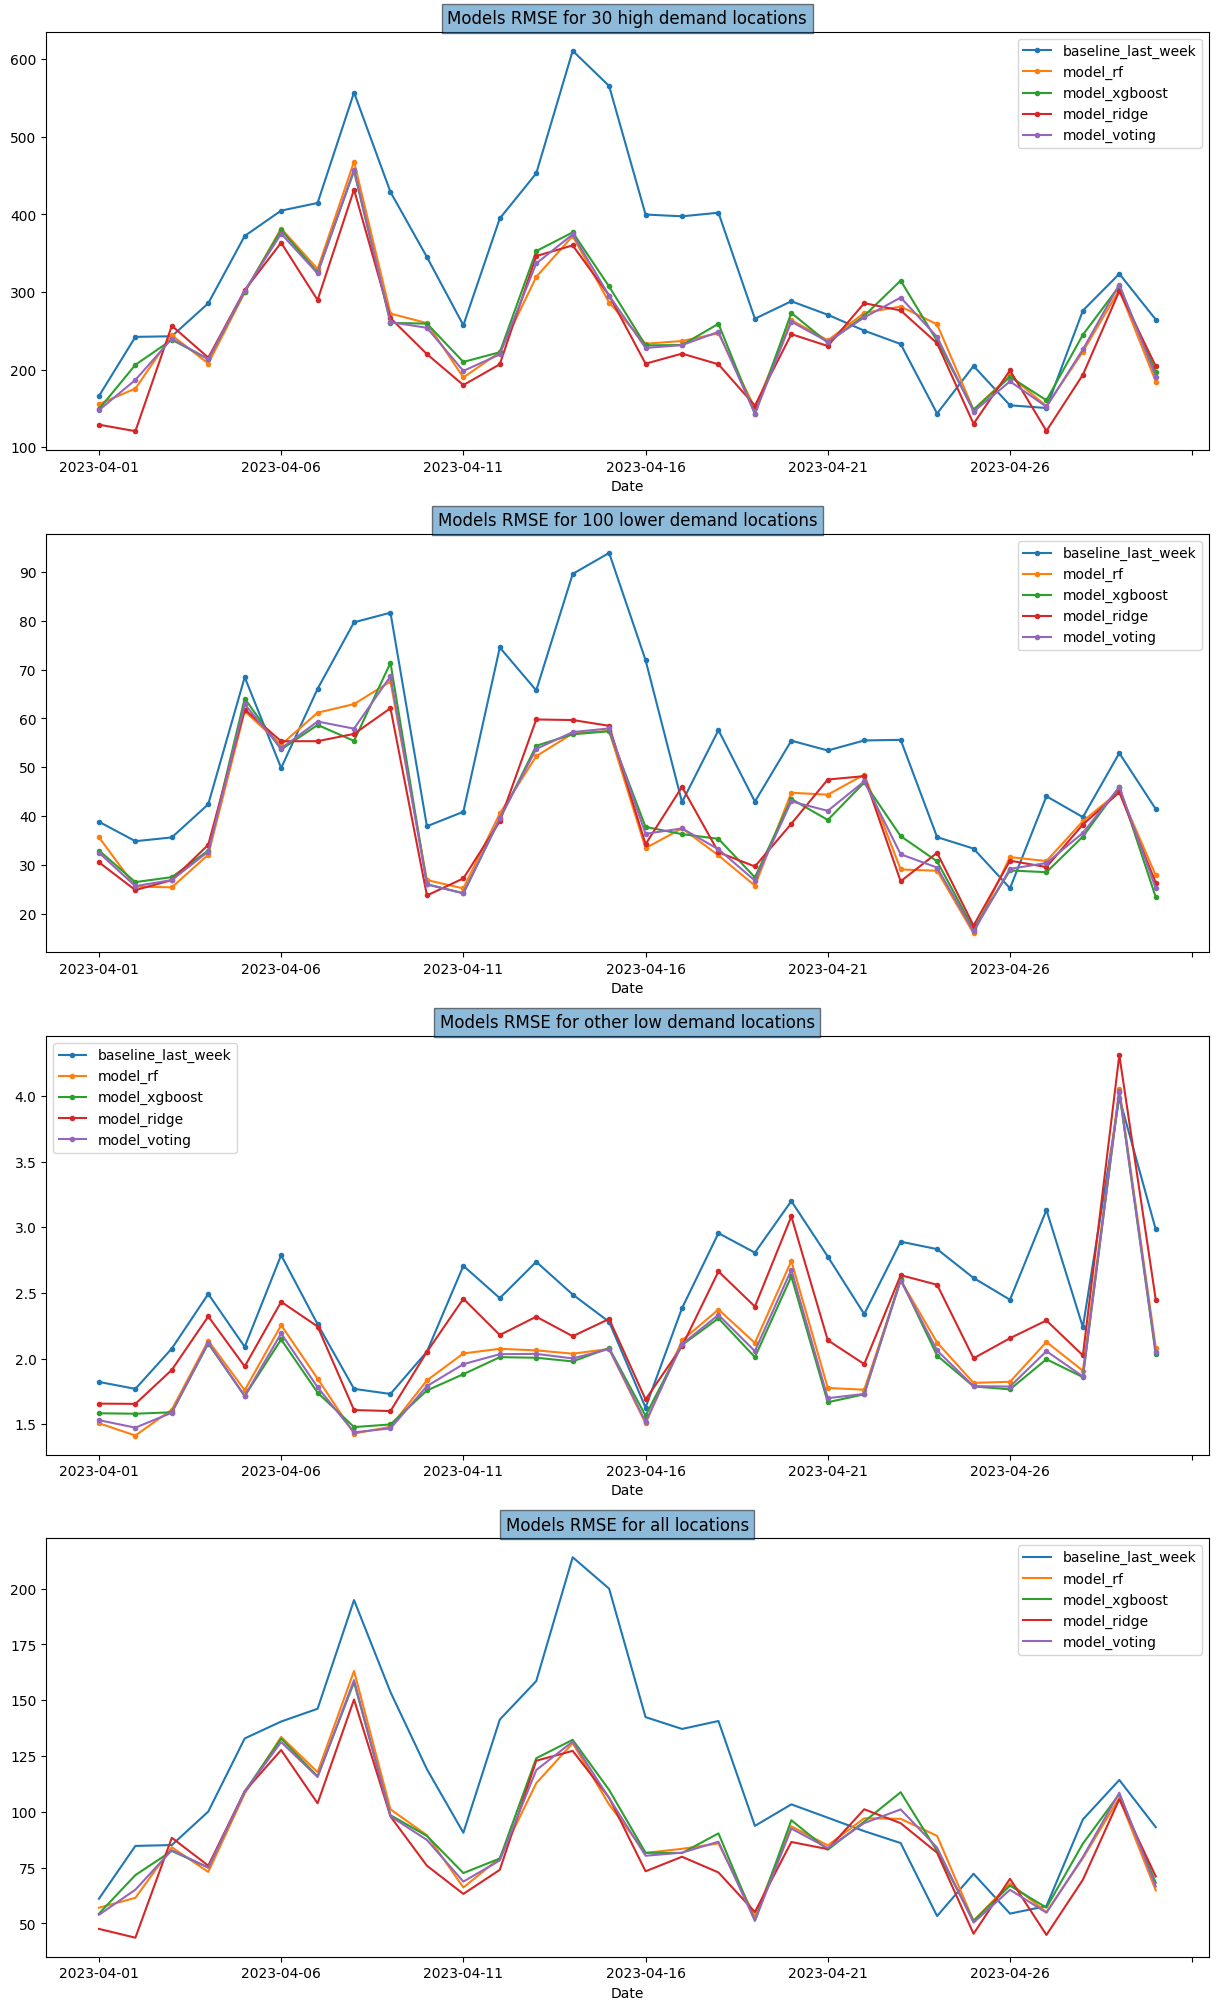

In [102]:
plot_rmse(predictions_mean_error_dict, 'Date')

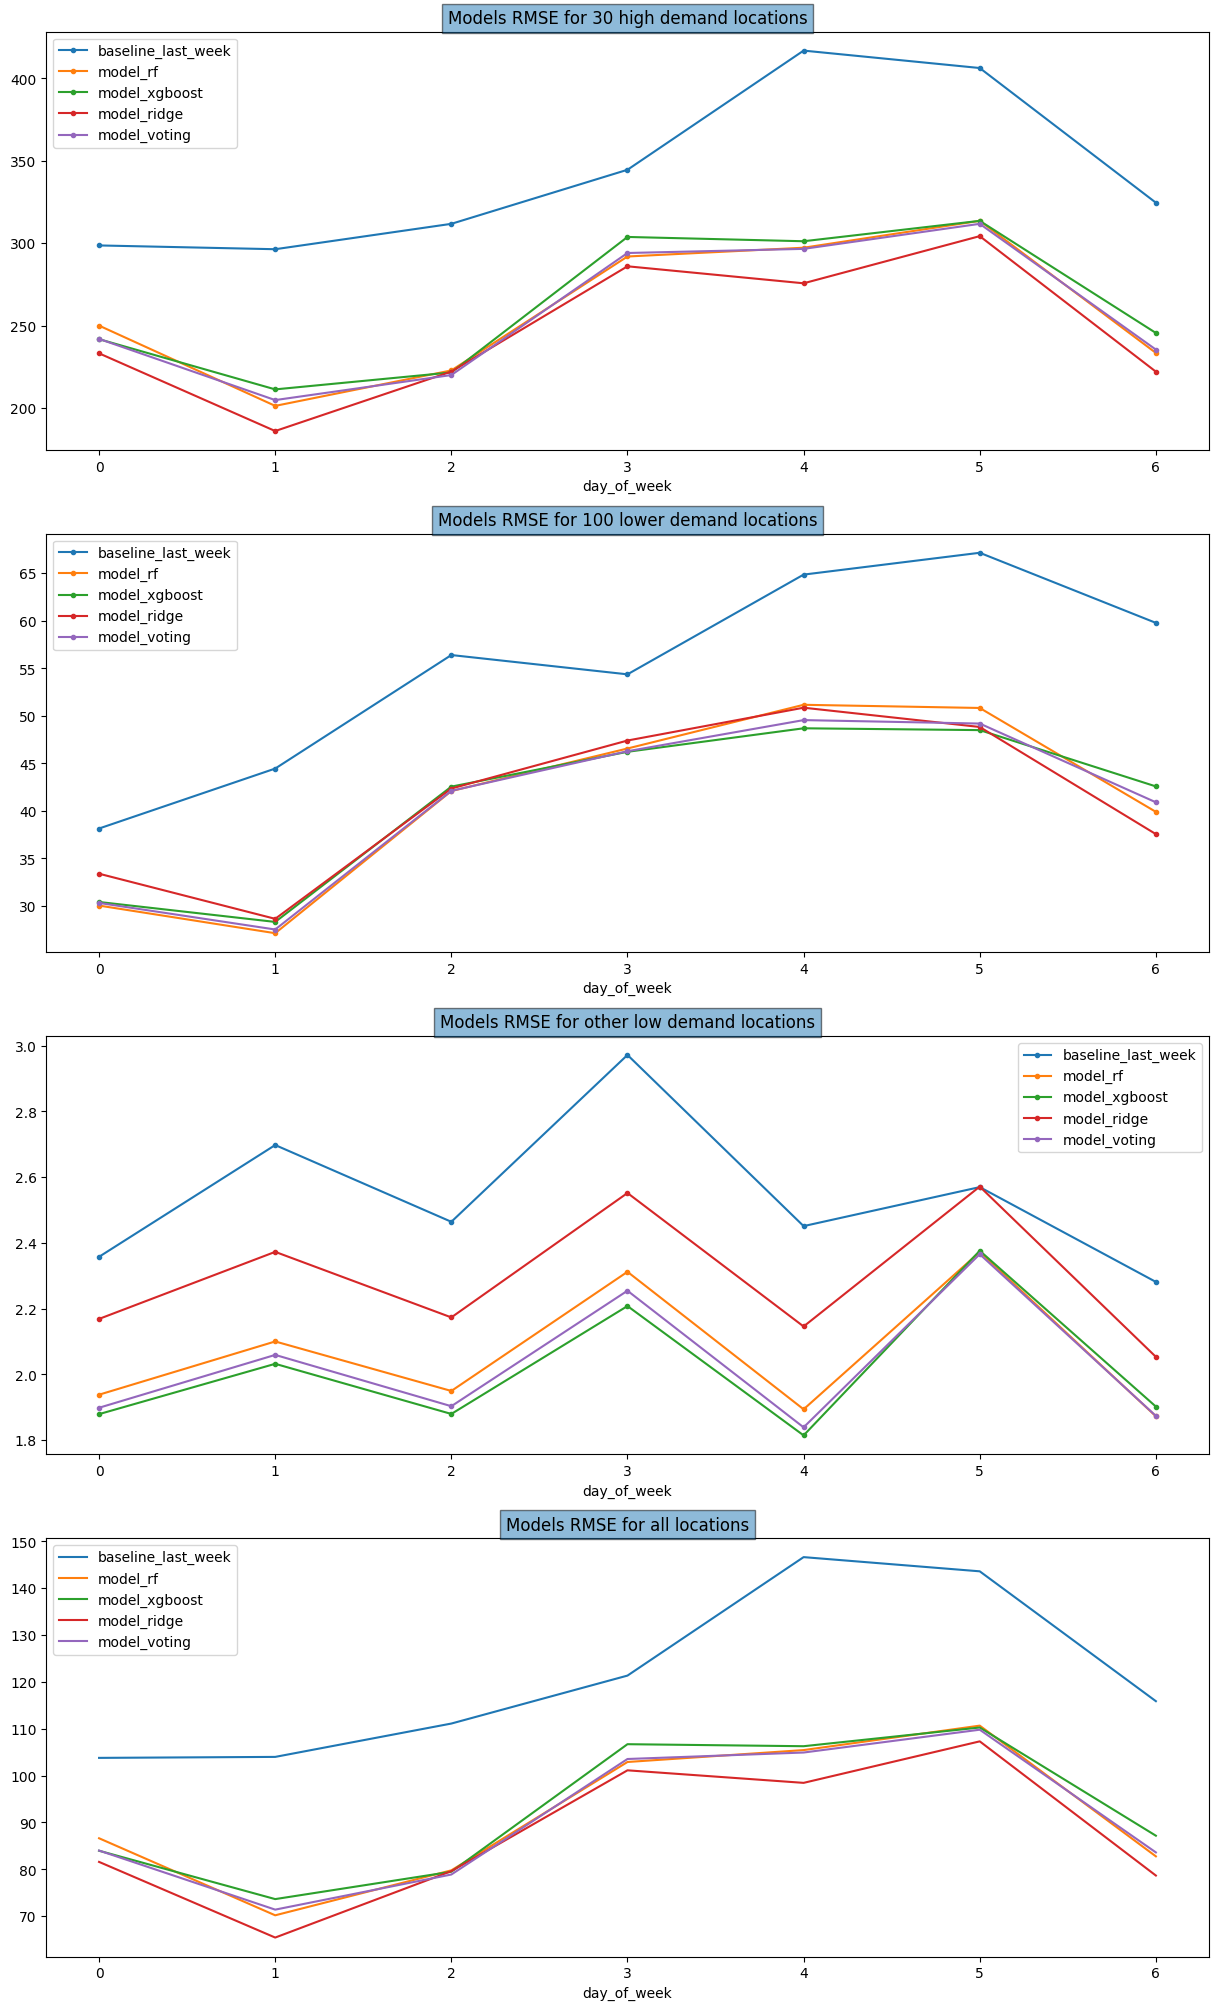

In [103]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [104]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_high_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:HIGH_DEMAND_NUMS]['Location'])]
            error_mid_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS]['Location'])]
            error_low_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]['Location'])]

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [105]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [106]:
df = pd.DataFrame(report_df,
                  index=pd.Index(report_df.index),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [107]:
df

location category: high_demand_locations                          \
Error Metrics:                      MAPE         MAE        RMSE   
baseline_last_week              8.910066  253.765556  347.264435   
model_rf                        6.765238  192.052817  262.613211   
model_xgboost                   6.754970  194.134162  266.694353   
model_ridge                     6.568453  184.742873  251.257089   
model_voting                    6.695025  191.115537  261.806379   

location category: mid_demand_locations                        \
Error Metrics:                     MAPE        MAE       RMSE   
baseline_last_week            33.408498  25.906000  56.420936   
model_rf                      28.685297  19.787474  42.292751   
model_xgboost                 29.913339  19.599353  42.033328   
model_ridge                   31.269799  19.757821  42.120893   
model_voting                  29.130706  19.563707  41.893455   

location category: low_demand_locations                     all_locations  \
Error Metrics:                     MAPE       MAE      RMSE          MAPE   
baseline_last_week            71.763276  1.606566  2.543063     49.927115   
model_rf                      72.710055  1.404770  2.075981     48.355779   
model_xgboost                 74.448044  1.395688  2.031267     49.698950   
model_ridge                   86.396361  1.598730  2.300960     56.215089   
model_voting                  73.322085  1.393051  2.043526     48.826094   

location category:                         
Error Metrics:            MAE        RMSE  
baseline_last_week  39.754326  122.582944  
model_rf            30.250998   92.637509  
model_xgboost       30.412943   93.918128  
model_ridge         29.500384   88.929588  
model_voting        30.052365   92.305806

In [108]:
df.style.format('{:.2f}')